In [1]:
%load_ext autoreload
%autoreload 2


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dataclasses import dataclass

import vice

In [2]:
import surp
from surp.src.analysis.vice_model import vice_model
from surp.src.analysis.apogee_analysis import subgiants
from surp.src.analysis import plotting_utils as pluto
import arya
arya.save_at("./figures")

from scipy.stats import chi2

In [3]:
def p_value(χ2, df):
    return 1-chi2.cdf(χ2*df, df=df)

In [4]:
@dataclass
class model_id():
    agb: str = None
    eta: str = None
    f_agb: str = None
    beta: str = None
    name: str = None
    version: str = ""


def find_model(id):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the vice_model object
    """
    if id.name is None:
        name = id.agb + "_f" + id.f_agb + "_Z" + id.beta + "_eta" + id.eta + id.version
    else:
        name = id.name
    file_name = "../../output/" + name + ".json"
    return vice_model(file_name)


fiducial = find_model(model_id(agb="cristallo11", f_agb="0.2", eta="1.0",
    beta="0.4", version="_v0.1.3"))

In [6]:
from scipy.optimize import curve_fit

err = -0.0293*MG_H + 0.0260
uncertaintines: a = 0.00042130320419965283, b = 0.00010007915864519442


Text(0, 0.5, 'MG/H error')

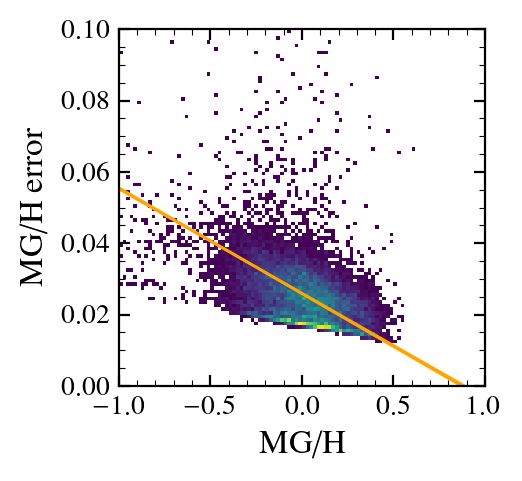

In [8]:
subgiants["MG_H_ERR"] = subgiants["MG_FE_ERR"] + subgiants["FE_H_ERR"]


plt.hist2d(subgiants["MG_H"], subgiants["MG_H_ERR"], range=((-1, 1), (0, 0.1)), bins=100, cmin=1)

filt = subgiants["FE_H_ERR"] < 1
filt &= (-3 < subgiants["MG_H"]) & (subgiants["MG_H"]< 3)

x = subgiants[filt]["MG_H"]
y = subgiants[filt]["MG_H_ERR"]

def lin(x, a, b):
    return a*x + b

popt, covt = curve_fit(lin, x, y)
a, b = popt
a_err, b_err = np.diag(covt)**0.5

x_m = np.linspace(-3, 1)
y_m = a*x_m + b
plt.plot(x_m, y_m, color="orange")
y_m = (a-a_err)*x_m + b - b_err
plt.plot(x_m, y_m, color="orange")


print(f"err = {a:0.4f}*MG_H + {b:0.4f}")
print(f"uncertaintines: a = {a_err}, b = {b_err}")
plt.xlabel("MG/H")
plt.ylabel("MG/H error")

err = -0.1096*MG_H + 0.0439
uncertaintines: a = 0.0022988623022158006, b = 0.0005396124900603797


Text(0, 0.5, 'C/Mg error')

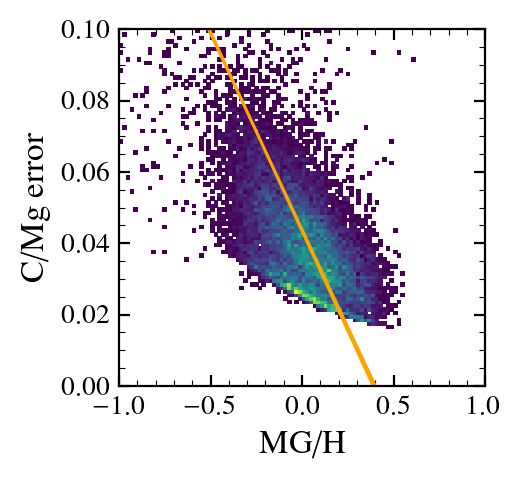

In [64]:
subgiants["C_MG_ERR"] = subgiants["MG_FE_ERR"] + subgiants["C_FE_ERR"]

plt.hist2d(subgiants["MG_H"], subgiants["C_MG_ERR"], range=((-1, 1), (0, 0.1)), bins=100, cmin=1)

filt = subgiants["FE_H_ERR"] < 1
filt &= (-3 < subgiants["MG_H"]) & (subgiants["MG_H"]< 3)
filt &= (-3 < subgiants["C_H"]) & (subgiants["C_H"]< 3)


x = subgiants[filt]["MG_H"]
y = subgiants[filt]["C_MG_ERR"]

def lin(x, a, b):
    return a*x + b

popt, covt = curve_fit(lin, x, y)
a, b = popt
a_err, b_err = np.diag(covt)**0.5

x_m = np.linspace(-3, 1)
y_m = a*x_m + b
plt.plot(x_m, y_m, color="orange")
y_m = (a-a_err)*x_m + b - b_err
plt.plot(x_m, y_m, color="orange")


print(f"err = {a:0.4f}*MG_H + {b:0.4f}")
print(f"uncertaintines: a = {a_err}, b = {b_err}")
plt.xlabel("MG/H")
plt.ylabel("C/Mg error")

err = -0.0224*MG_H + 0.0166
uncertaintines: a = 0.0003259769772541719, b = 7.743473324879524e-05


Text(0, 0.5, 'MG/FE error')

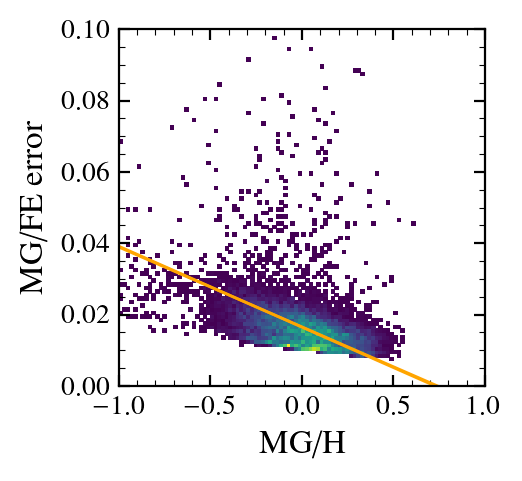

In [63]:
plt.hist2d(subgiants["MG_H"], subgiants["MG_FE_ERR"], range=((-1, 1), (0, 0.1)), bins=100, cmin=1)

filt = subgiants["FE_H_ERR"] < 1
filt &= (-3 < subgiants["MG_H"]) & (subgiants["MG_H"]< 3)


x = subgiants[filt]["MG_H"]
y = subgiants[filt]["MG_FE_ERR"]

def lin(x, a, b):
    return a*x + b

popt, covt = curve_fit(lin, x, y)
a, b = popt
a_err, b_err = np.diag(covt)**0.5

x_m = np.linspace(-3, 1)
y_m = a*x_m + b
plt.plot(x_m, y_m, color="orange")
y_m = (a-a_err)*x_m + b - b_err
plt.plot(x_m, y_m, color="orange")


print(f"err = {a:0.4f}*MG_H + {b:0.4f}")
print(f"uncertaintines: a = {a_err}, b = {b_err}")
plt.xlabel("MG/H")
plt.ylabel("MG/FE error")

So, let us define the errors of MG_H and C_MG as
$$
\delta[MG/H] = \min(0.015, -0.0293*[MG/H] + 0.0260)\\
\delta[C/Mg] = \min(0.02, -0.1096*[MG/H] + 0.0439)\\
\delta[MG/Fe] = \min(0.01, -0.0224*[MG/H] + 0.0166)\\
$$


In [68]:
np.random.normal(scale=[1,2,3])

array([-0.14419978,  1.4368398 ,  2.86922069])

In [70]:
np.maximum(3, [2,1,6])

array([3, 3, 6])

In [98]:
def mg_h_err(mg_h):
    return np.maximum(0.015,
                     -0.03*mg_h + 0.025)

def c_mg_err(mg_h):
    return np.maximum(0.02, 
                     -0.11*mg_h + 0.04)

def mg_fe_err(mg_h):
    return np.maximum(0.01,
                     -0.0225*mg_h+0.02)

In [171]:
def model_dist(model, scale=1):
    dist = pd.DataFrame()
    s = model.stars["solar"]
    
    mg_h = s["[o/h]"]
    mg_fe = s["[o/fe]"]
    c_mg = s["[c/o]"]
        
    dist["MG_H"] = mg_h + np.random.normal(scale=scale*mg_h_err(mg_h))
    dist["MG_FE"] = mg_fe + np.random.normal(scale=scale*mg_fe_err(mg_h))
    dist["C_MG"] = c_mg + np.random.normal(scale=scale*c_mg_err(mg_h))
    # add uncertainties
    return dist
    


In [172]:
def plot_model(model):
    s = fiducial.stars["solar"]
    N = len(s)
    dx = 0.03
    dy = 0.03
    sp = arya.Subplot()
    #aah.plot_contour("[mg/h]", "[c/n]", ax=sp.mpl_ax, zorder=3)

    scat = arya.Scatter(s["[o/h]"] + np.random.normal(0, dx, N), s["[c/n]"] + np.random.normal(0, dy, N), 
                 c = s["r_origin"], s=0.2, zorder=2, subplot=sp)
    scat.clim = (0, 12)
    cb = arya.Colorbar(subplot=sp, layer=scat, row=0, col=1)
    cb.label = "$R_0$ (kpc)"


    sp.x.label=r"[$\alpha$/H]"
    sp.y.label=r"[C/N]"
    sp.x.lim=(-0.6, 0.6)
    sp.y.lim=(-0.5, 0.4)


In [181]:
def plot_dev(model, xlim=(-1, 1), ylim=(-1, 1), bins=100):
    r = (xlim, ylim)

    df = model
    m_counts,_,_,_ = plt.hist2d(df.MG_H, df.C_MG, range=r, bins=bins, cmin=1)
    d_counts, _, _, _ = plt.hist2d(subgiants.MG_H, subgiants.C_MG, range=r, bins=bins, cmin=1)
    plt.gca().clear()
    
    diff = np.transpose(m_counts - d_counts)[::-1]

    m_scale = np.nansum(m_counts)
    m_errs = np.sqrt(m_counts)/m_scale
    m_frac = m_counts/m_scale

    d_scale = np.nansum(d_counts)
    d_errs = np.sqrt(d_counts)/d_scale
    d_frac = d_counts/d_scale

    dev = (m_frac - d_frac)/(m_errs + d_errs)
    img = np.transpose(dev)[::-1]

    plt.imshow(img, extent=r[0] + r[1], cmap = "RdBu")
    plt.colorbar(label="model-data (scaled deviation)")
    plt.show()

    N = np.nansum(m_frac + d_frac > 0)
    sumsqr = np.nansum((m_counts/m_scale*d_scale - d_counts)**2/d_counts)

    chi_sq = sumsqr/N
    print(f"χ2 = {chi_sq:0.3f}")


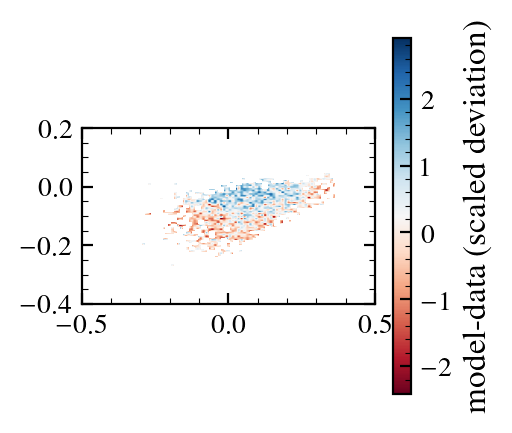

χ2 = 7.064


In [182]:
plot_dev(model_dist(fiducial, 1.7), xlim=(-0.5, 0.5), ylim=(-0.4, 0.2))

In [186]:
pd.to_csv?

Object `pd.to_csv` not found.


In [188]:
import gc

In [190]:
from os import path

In [192]:
path.filename?

Object `path.filename` not found.


In [193]:
path.base?

Object `path.base` not found.


In [196]:
def save_result(model, filename, scale=1):
    dist = pd.DataFrame()
    s = model.stars["solar"]
    
    mg_h = s["[o/h]"]
    mg_fe = s["[o/fe]"]
    c_mg = s["[c/o]"]
        
    dist["MG_H"] = mg_h
    dist["MG_FE"] = mg_fe 
    dist["C_MG"] = c_mg 
    
    dist.to_csv(filename)
    
    # add uncertainties
    del [[dist]]
    gc.collect()

def filename(id):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the vice_model object
    """
    if id.name is None:
        name = id.agb + "_f" + id.f_agb + "_Z" + id.beta + "_eta" + id.eta + id.version
    else:
        name = id.name
    file_name = "../../output/" + name + ".json"

    return file_name

m_id = model_id(agb="cristallo11", f_agb="0.2", eta="1.0",beta="0.4", version="_v0.1.3")

def get_result(m_id):
    name = filename(m_id)
    basename = path.splitext(path.basename(name))[0]
    model = vice_model(name)
    savename = path.join("../../results/", basename + ".csv")
    save_result(model, savename)

In [203]:
def get_result(name):
    basename = path.splitext(path.basename(name))[0]
    print("loading", name)
    model = vice_model(name)
    savename = path.join("../../results/", basename + ".csv")
    print("saving", savename)
    save_result(model, savename)

In [199]:
from glob import glob

In [ ]:
for file in glob("../../output/*.json"):
    get_result(file)